In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score

In [2]:
df = pd.read_csv("sonar data.csv", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [6]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

<AxesSubplot:ylabel='60'>

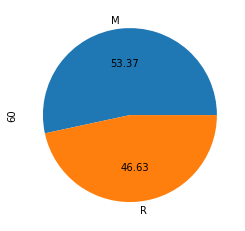

In [11]:
df[60].value_counts().plot(kind='pie', autopct='%0.2f')

<AxesSubplot:>

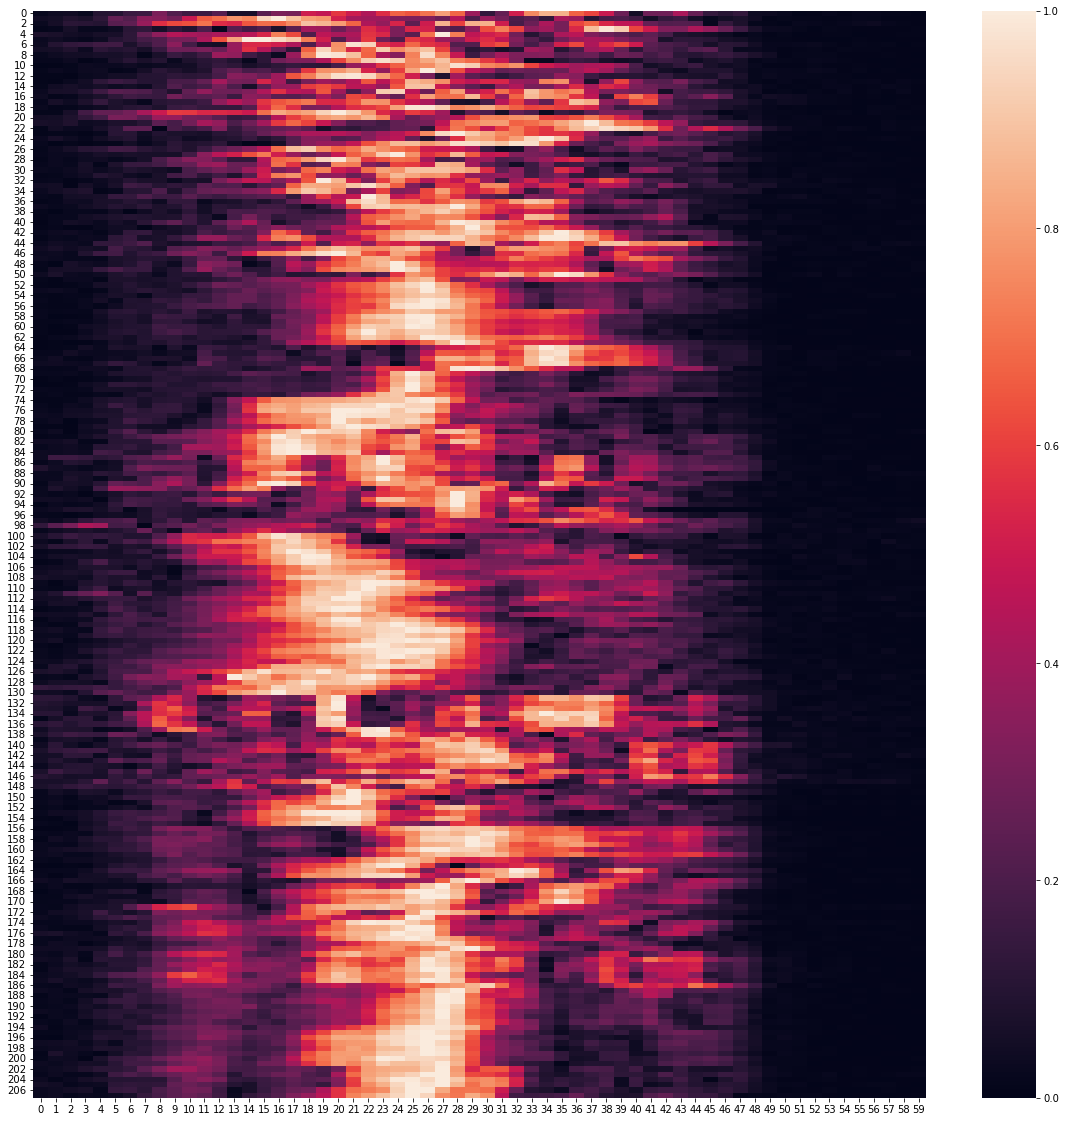

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,0:60])

# Train_Test_Splitting

In [23]:
X = df.iloc[:,0:60]
y = df.iloc[:,-1]

In [24]:
print(X.shape)
print(y.shape)

(208, 60)
(208,)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)

In [65]:
print(X_train.shape)
print(X_test.shape)

(187, 60)
(21, 60)


# Modeling

In [70]:
clf = LogisticRegression()

In [71]:
clf.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred = clf.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)

In [75]:
print("The accuracy for test data is: ", accuracy)

The accuracy for test data is:  0.7619047619047619


# Predictive system

In [76]:
input_data = (0.0298,0.0615,0.0650,0.0921,0.1615,0.2294,0.2176,0.2033,0.1459,0.0852,0.2476,0.3645,0.2777,0.2826,0.3237,0.4335,0.5638,0.4555,0.4348,0.6433,0.3932,0.1989,0.3540,0.9165,0.9371,0.4620,0.2771,0.6613,0.8028,0.4200,0.5192,0.6962,0.5792,0.8889,0.7863,0.7133,0.7615,0.4401,0.3009,0.3163,0.2809,0.2898,0.0526,0.1867,0.1553,0.1633,0.1252,0.0748,0.0452,0.0064,0.0154,0.0031,0.0153,0.0071,0.0212,0.0076,0.0152,0.0049,0.0200,0.0073)
input_data_arr = np.asarray(input_data).reshape(1, -1)

prediction = clf.predict(input_data_arr)

if prediction[0] == 'R':
    print("The object is Rock")
else:
    print("The object is Mine")

The object is Rock
